In [8]:
import numpy as np
import matplotlib.pyplot as plt

Experimento 1


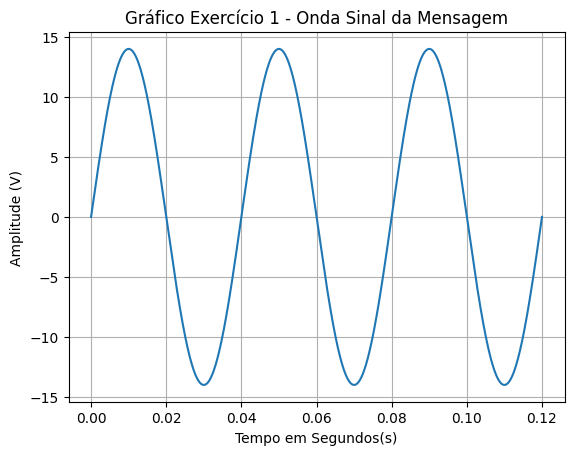

In [9]:
fs = 25
fc = 250
A = 10
Em = 14
m = Em/A
N = 1000

Tm = 1/fs
t = np.linspace(0,3*Tm,N)

mensagem = Em*np.sin(2*np.pi*fs*t)

plt.plot(t, mensagem)
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal da Mensagem")
plt.grid(True)
plt.figure(1)
plt.show()

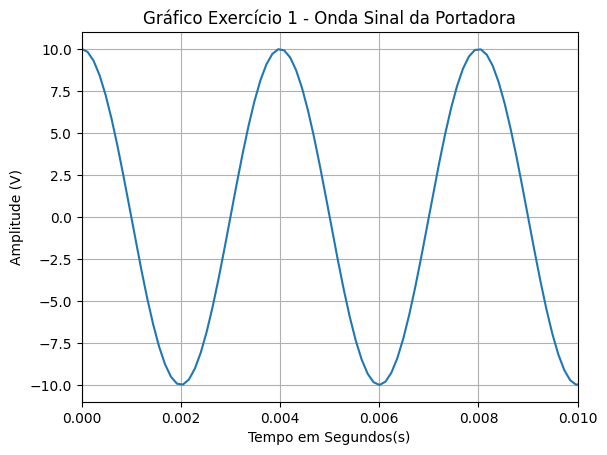

<Figure size 640x480 with 0 Axes>

In [10]:

portadora = A*np.cos(2*np.pi*fc*t)

plt.plot(t, portadora)
plt.xlim(0, 0.01)

plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal da Portadora")
plt.grid(True)
plt.figure(2)
plt.show()

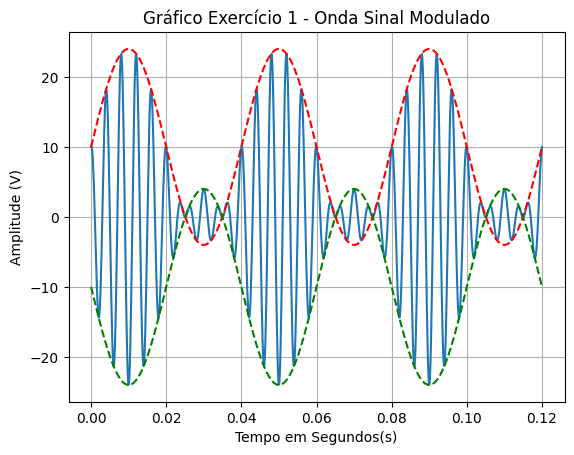

<Figure size 640x480 with 0 Axes>

In [11]:
mensagem_normalizada = np.sin(2*np.pi*fs*t) 
sinal_modulado = A * (1 + m * mensagem_normalizada) * np.cos(2*np.pi*fc*t)

envelope_superior = A * (1 + m * mensagem_normalizada)
envelope_inferior = -envelope_superior

plt.plot(t, sinal_modulado)

plt.plot(t, envelope_superior, color='red', linestyle='--', label='Envoltória')
plt.plot(t, envelope_inferior, color='green', linestyle='--')

plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal Modulado")
plt.grid(True)
plt.figure(3)
plt.show()

Experimento 2

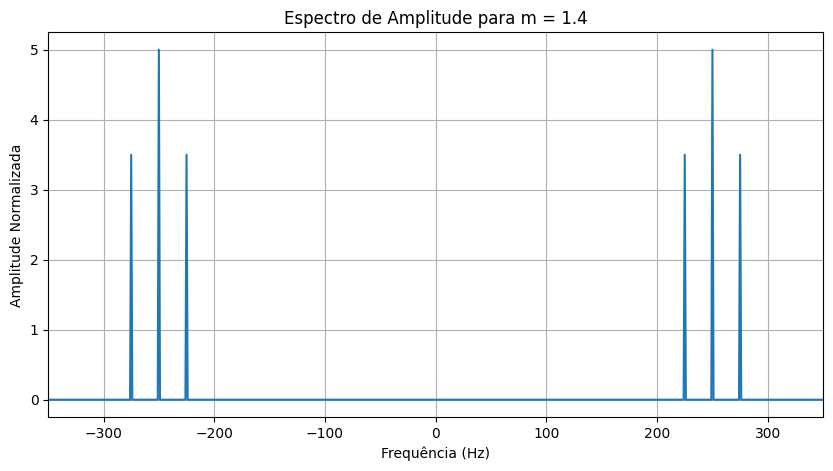

In [12]:
m1 =1.4
N= 8000
t = np.linspace(0, 1, N, endpoint=False)

mensagem_normalizada = np.sin(2*np.pi*fs*t)
sinal_modulado = A * (1 + m1 * mensagem_normalizada) * np.cos(2*np.pi*fc*t)

eixo_y = abs(np.fft.fftshift(np.fft.fft(sinal_modulado))) / N

dt = t[1] - t[0]
frequencia = np.fft.fftfreq(N, dt)
eixo_x = np.fft.fftshift(frequencia)

plt.figure(figsize=(10, 5))
plt.plot(eixo_x, eixo_y)
plt.title(f"Espectro de Amplitude para m = {m1}")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude Normalizada")
plt.grid(True)
plt.xlim(-350, 350)
plt.show()

Experimento 3

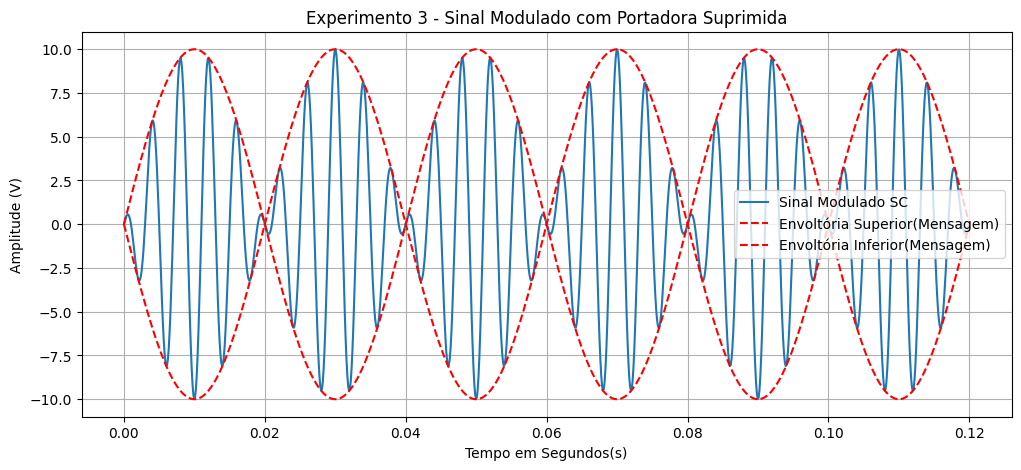

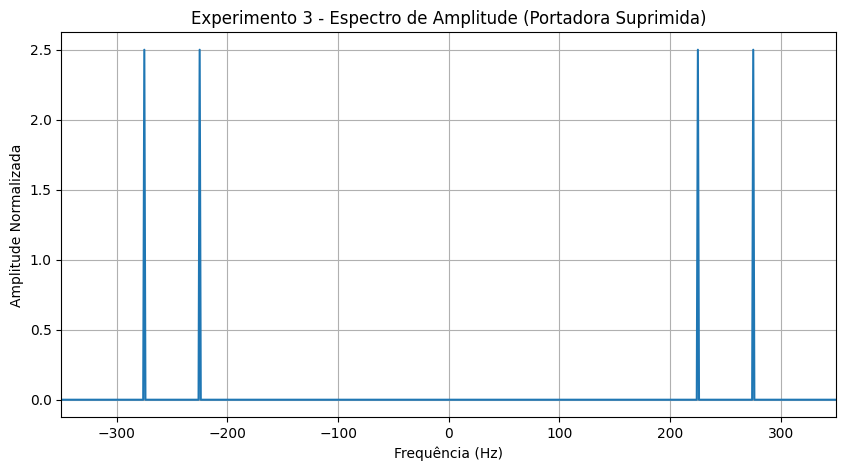

In [13]:

fs = 25
fc = 250
A = 10
Em = 10

N_tempo = 1000
Tm = 1/fs
t_tempo = np.linspace(0, 3*Tm, N_tempo)

mensagem = Em * np.sin(2 * np.pi * fs * t_tempo)
portadora_normalizada = np.cos(2 * np.pi * fc * t_tempo)

sinal_modulado_sc = mensagem * portadora_normalizada

plt.figure(figsize=(12, 5))
plt.plot(t_tempo, sinal_modulado_sc, label='Sinal Modulado SC')
plt.plot(t_tempo, mensagem, color='red', linestyle='--', label='Envoltória Superior(Mensagem)')
plt.plot(t_tempo, -mensagem, color='red', linestyle='--', label='Envoltória Inferior(Mensagem)')

plt.title("Experimento 3 - Sinal Modulado com Portadora Suprimida")
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.legend()
plt.show()

Na = 8000
t_fft = np.linspace(0, 1, Na, endpoint=False)

mensagem_fft = Em * np.sin(2 * np.pi * fs * t_fft)
portadora_norm_fft = np.cos(2 * np.pi * fc * t_fft)
sinal_modulado_sc_fft = mensagem_fft * portadora_norm_fft

eixo_y_sc = abs(np.fft.fftshift(np.fft.fft(sinal_modulado_sc_fft))) / Na
dt = t_fft[1] - t_fft[0]
frequencia = np.fft.fftfreq(Na, dt)
eixo_x_sc = np.fft.fftshift(frequencia)

plt.figure(figsize=(10, 5))
plt.plot(eixo_x_sc, eixo_y_sc)
plt.title("Experimento 3 - Espectro de Amplitude (Portadora Suprimida)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude Normalizada")
plt.grid(True)
plt.xlim(-350, 350)
plt.show()

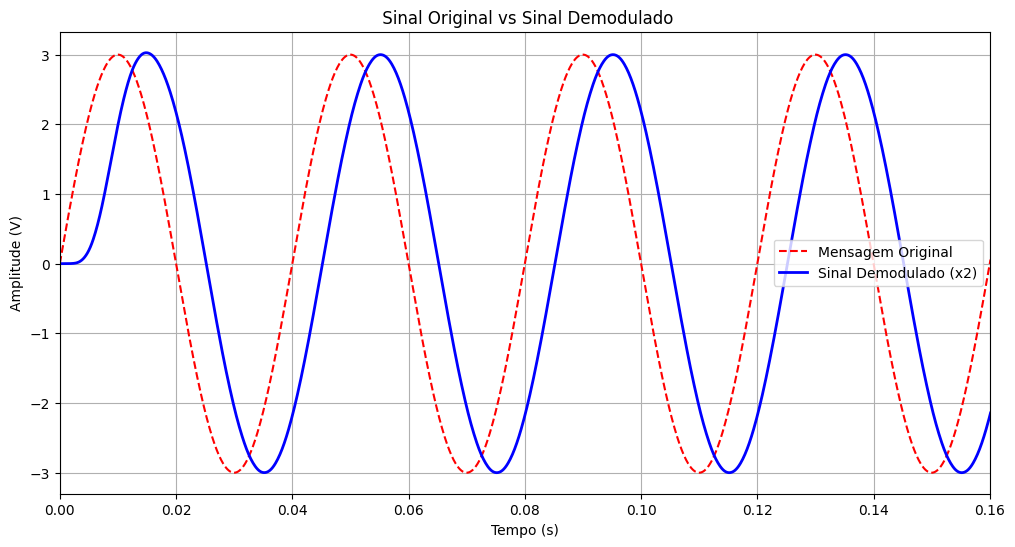

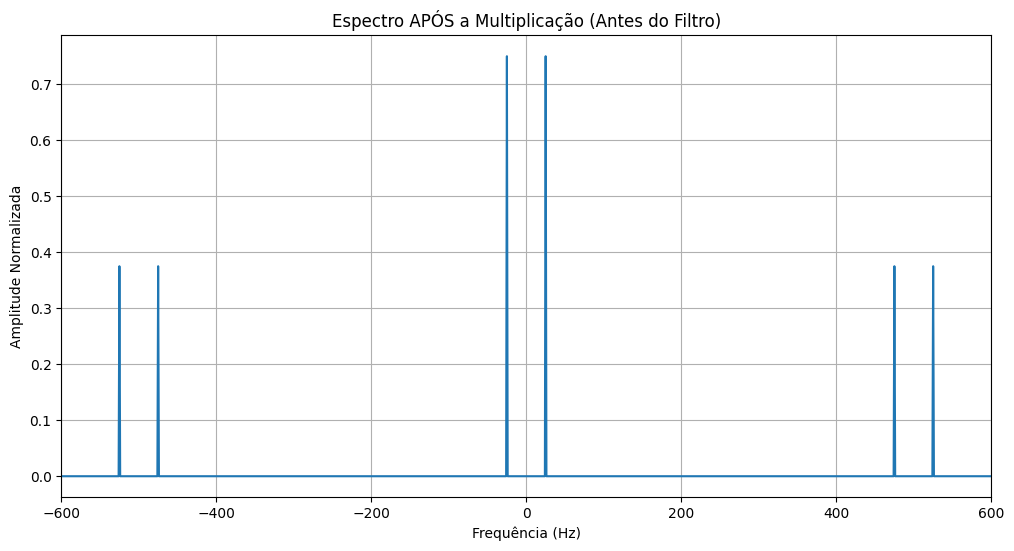

In [14]:
from scipy.signal import butter, lfilter

fs = 25
fc = 250
Em = 3

Na2= 8000
t = np.linspace(0, 1, Na2, endpoint=False)

mensagem_original = Em * np.sin(2 * np.pi * fs * t)
portadora_norm = np.cos(2 * np.pi * fc * t)

sinal_modulado_sc = mensagem_original * portadora_norm

sinal_multiplicado = sinal_modulado_sc * portadora_norm

frequencia_corte = 100
ordem_filtro = 5 
b, a = butter(ordem_filtro, frequencia_corte, btype='low', fs=Na2)

sinal_demodulado = lfilter(b, a, sinal_multiplicado)

plt.figure(figsize=(12, 6))
plt.plot(t, mensagem_original, 'r--', label='Mensagem Original')
plt.plot(t, sinal_demodulado * 2, 'b-', label='Sinal Demodulado (x2)', linewidth=2)
plt.title(' Sinal Original vs Sinal Demodulado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.xlim(0, 4/fs)
plt.show()

plt.figure(figsize=(12, 6))
eixo_y_mult = np.abs(np.fft.fftshift(np.fft.fft(sinal_multiplicado))) / Na2
dt = t[1] - t[0]
frequencia_mult = np.fft.fftshift(np.fft.fftfreq(Na2, dt))
plt.plot(frequencia_mult, eixo_y_mult)
plt.title('Espectro APÓS a Multiplicação (Antes do Filtro)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude Normalizada')
plt.grid(True)
plt.xlim(-600, 600)
plt.show()